<a href="https://colab.research.google.com/github/meherkalsi13-png/ds3001_final_project_group_g/blob/main/DS3001_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install package and import the dataset to code**

In [1]:
%pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
risk_factor_prediction_of_chronic_kidney_disease = fetch_ucirepo(id=857)

# data (as pandas dataframes)
x = risk_factor_prediction_of_chronic_kidney_disease.data.features.copy()
y = risk_factor_prediction_of_chronic_kidney_disease.data.targets.copy()

# metadata
print(risk_factor_prediction_of_chronic_kidney_disease.metadata, '\n')

# variable information
print(risk_factor_prediction_of_chronic_kidney_disease.variables)

{'uci_id': 857, 'name': 'Risk Factor Prediction of Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv', 'abstract': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 200, 'num_features': 28, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5WP64', 'creators': ['Md. Ashiqul Islam', 'Shamima Akter'], 'intro_paper': {'ID': 268, 'type': 'NATIVE', 'title': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine L

**Metadata**: '**uci_id**': 857, '**name**': 'Risk Factor Prediction of Chronic Kidney Disease', '**repository_url**': 'https://archive.ics.uci.edu/dataset/857/risk+factor+prediction+of+chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/857/data.csv',

'**abstract**': 'Chronic kidney disease (CKD) is an increasing medical issue that declines the productivity of renal capacities and subsequently damages the kidneys.',

  '**area**': 'Health and Medicine', '**tasks**': ['Classification', 'Regression'],  '**characteristics**': ['Multivariate'],
  '**num_instances**': 200,
  '**num_features**': 28,
  '**feature_types**': ['Real'],
  '**demographics**': [],
  '**target_col**': ['class'],
  '**index_col**': None,
  '**has_missing_values**': 'no',
  '**missing_values_symbol**': None,
  '**year_of_dataset_creation**': 2020,
  '**last_updated**': 'Fri Mar 08 2024',
  '**dataset_doi**': '10.24432/C5WP64',
  '**creators**': ['Md. Ashiqul Islam', 'Shamima Akter'],


'**intro_paper**':
  '**ID**': 268,
  '**type**': 'NATIVE',
  '**title**': 'Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms',
  '**authors**': 'M. Islam, S. Akter, M. Hossen, Sadia Ahmed Keya, Sadia Afrin Tisha, Shahed Hossain',
  '**venue**': 'International Conferences on Information Science and System',
  '**year**': 2020,
  '**journal**': None,
  '**DOI**': None,
  '**URL**': 'https://www.semanticscholar.org/paper/a4b90dd7b9dfaffa9eff1efc6555bbce62a963d7',
  '**sha**': None,
  '**corpus**': None,
  '**arxiv**': None,
  '**mag**': None,
  '**acl**': None,
  '**pmid**': None,
  '**pmcid**': None},

'**additional_info**':
  '**summary**': 'This dataset is real Bangladeshi patient data. The dataset is collected from Enam Medical College, Savar, Dhaka, Bangladesh.\n',
  '**purpose**': None,
  '**funded_by**': None,
  '**instances_represent**': None,
  '**recommended_data_splits**': None,
  '**sensitive_data**': None,
  '**preprocessing_description**': 'This dataset is not pre-processed, if you want to apply a Machine learning Algorithm at first you have to need to pre-process the data',
  '**variable_info**': '1. bp(Diastolic)\n2. bp limit\n3. sg\n4. al\n5. class\n6. rbc\n7. su\n8. pc\n9. pcc\n10. ba\n11.bgr\n12. bu\n13. sod\n14. sc\n15. pot\n16. hemo\n17. pcv\n18. rbcc\n19. wbcc\n20. htn\n21. dm\n22. cad\n23. appet\n24. pe\n25. ane\n26. grf\n27. stage\n28. affected\n29. age',
  '**citation**': "M. A. Islam, S. Akter, M. S. Hossen, S. A. Keya, S. A. Tisha and S. Hossain, 'Risk Factor Prediction of Chronic Kidney Disease based on Machine Learning Algorithms,' 2020 3rd International Conference on Intelligent Sustainable Systems (ICISS), Thoothukudi, India, 2020, pp. 952-957, doi: 10.1109/ICISS49785.2020.9315878."


In [3]:
x = x.drop(columns=['bp (Diastolic)', 'bp limit']) #drop both columns because the data does not make sense to be binary - they should be int or float so we remove the columns

x['stage'] = x['stage'].str.replace('s', '').astype(int) #remove 's' from stage to allow the values to be numeric
y['class'] = (
    y['class']
    .astype(str)
    .str.strip()
    .str.lower()
    .map({'ckd': 1, 'notckd': 0})
)

display(x.head()) #X is the different measurements of the patients
display(y.head()) #Y is the class (whether there is chronic kidney disease or not)



,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,1.019 - 1.021,1-Jan,0,< 0,0,0,0,< 112,< 48.1,138 - 143,...,0,0,0,0,0,0,≥ 227.944,1,1,< 12
1,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,...,0,0,0,0,0,0,≥ 227.944,1,1,< 12
2,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,...,0,0,0,1,0,0,127.281 - 152.446,1,1,< 12
3,1.009 - 1.011,3-Mar,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,...,0,0,0,0,0,0,127.281 - 152.446,1,1,< 12
4,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,...,0,1,0,1,1,0,127.281 - 152.446,1,1,20-Dec


,class
0,1
1,1
2,1
3,1
4,1


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Data Cleaning

In [5]:
def clean_numeric(val):
    """
    Convert messy numeric entries to floats.
    Handles cases like:
    - '1.009 - 1.011'
    - '< 0'
    - '≥ 227.944'
    - '12 - 18'
    - 'discrete', 'meta', NaN → np.nan
    """
    if pd.isna(val):
        return np.nan

    s = str(val).strip()

    #remove known non-values
    if s in ['discrete', 'meta', 'nan']:
        return np.nan

    # "< 0" → 0
    if "<" in s:
        return 0.0

    # "≥ 227.944" → 227.944
    if "≥" in s:
        return float(s.replace("≥","").strip())

    #range: "1.009 - 1.011"
    if "-" in s:
        parts = s.split("-")
        try:
            nums = [float(p.strip()) for p in parts]
            return np.mean(nums)  # midpoint
        except:
            return np.nan

    #pure number
    try:
        return float(s)
    except:
        return np.nan

In [6]:
#identify numeric-like columns from the dataset
numeric_cols = [
    col for col in x.columns
    if any(keyword in col.lower() for keyword in
           ["sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc","grf","age"])
]

#apply cleaning
for col in numeric_cols:
    if col in x.columns:
        x[col] = x[col].apply(clean_numeric)

In [7]:
#clean catagorical data
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'normal': 0, 'abnormal': 1,
    'good': 0, 'poor': 1,
    '0': 0, '1': 1
}

binary_cols = ['rbc','pc','pcc','ba','htn','dm','cad','pe','ane','appet']

for col in binary_cols:
    if col in x.columns:
        x[col] = (
            x[col]
            .astype(str)
            .str.lower()
            .map(binary_map)
        )

In [8]:
#Data imputation
#filling numeric missing values with column median
for col in x.columns:
    if x[col].dtype != "object":
        x[col] = x[col].fillna(x[col].median())

# one hot encode remaining categorical columns
x = pd.get_dummies(x, drop_first=True)

Data Prep for Model

In [9]:
y_series= y['class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    x, y_series, test_size=0.2, random_state=42, stratify=y
)

#scale continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EDA

In [10]:
#make copy of df for safety during EDA
df = x.copy()
df['class'] = y['class']

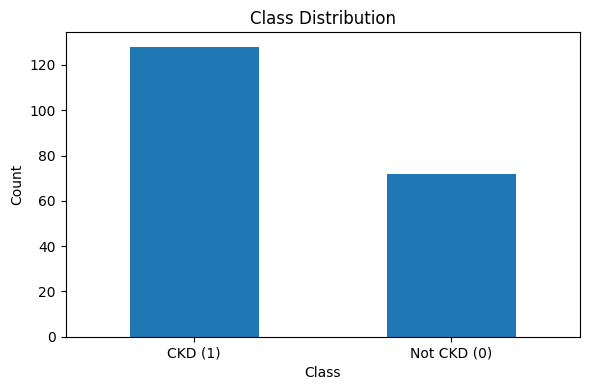

In [11]:
plt.figure(figsize=(6,4))
df['class'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1], labels=['CKD (1)', 'Not CKD (0)'], rotation=0)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

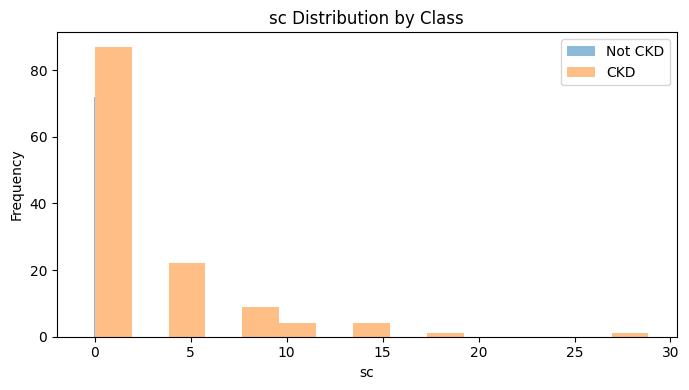

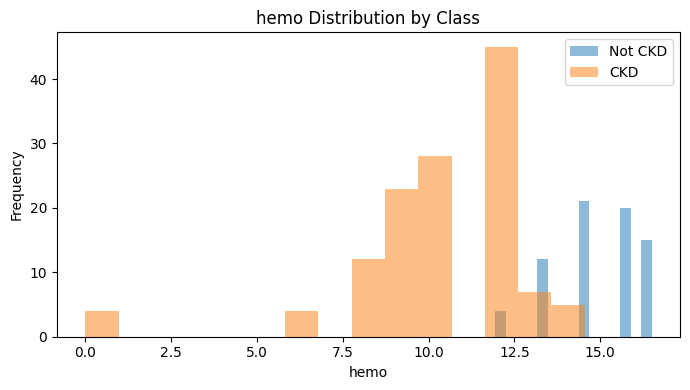

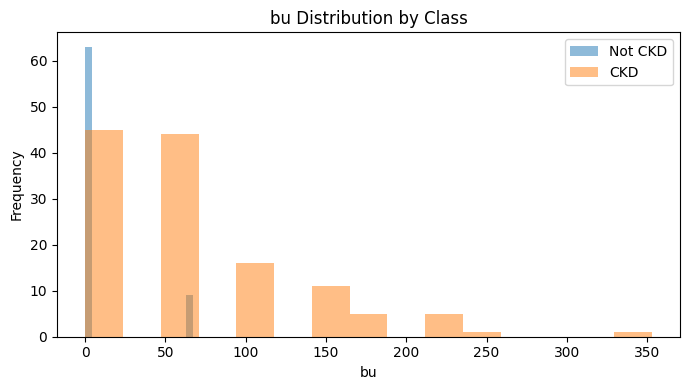

In [12]:
key_numeric = ['sc', 'hemo', 'bu']

for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        for label, subset in df.groupby('class'):
            label_name = 'CKD' if label == 1 else 'Not CKD'
            plt.hist(
                subset[col].dropna(),
                bins=15,
                alpha=0.5,
                label=label_name
            )
        plt.title(f'{col} Distribution by Class')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [13]:
group_means = df.groupby('class')[key_numeric].mean()
print(group_means)


             sc       hemo         bu
class                                
0      0.000000  14.956250   8.393750
1      2.670313  10.469531  68.992188


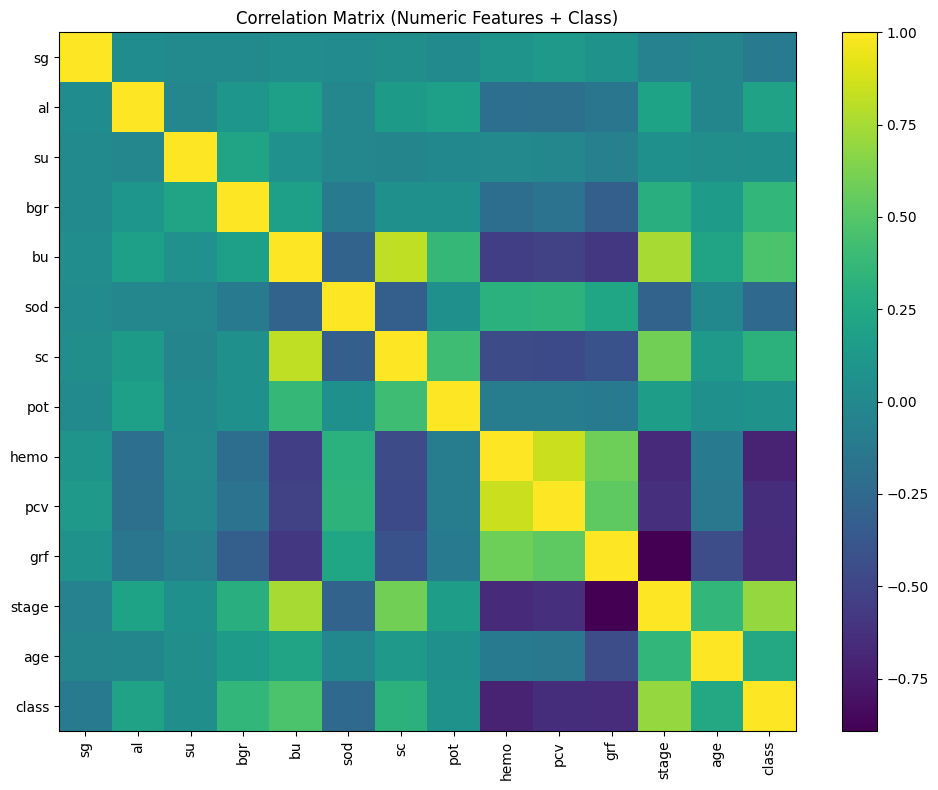

In [14]:
numeric_for_corr = df[numeric_cols + ['class']].copy()
corr = numeric_for_corr.corr()

plt.figure(figsize=(10,8))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Matrix (Numeric Features + Class)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2369790015.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, hue='class', fill=True, common_norm=False) # Step 3b: Generate a KDE plot


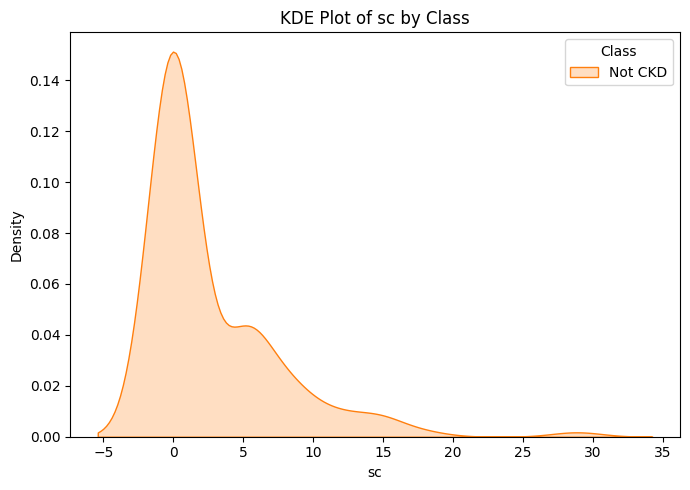

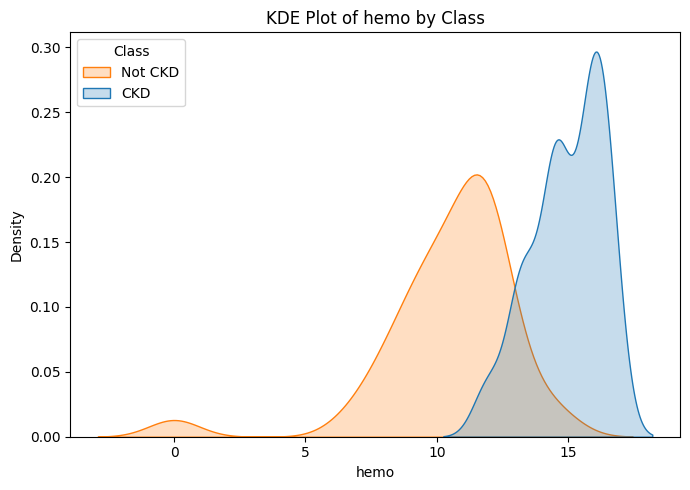

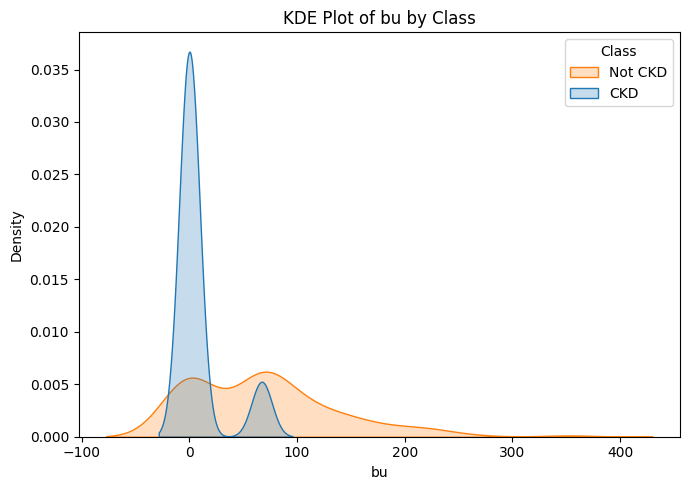

In [15]:
import seaborn as sns

for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7, 5))
        sns.kdeplot(data=df, x=col, hue='class', fill=True, common_norm=False) # Generate a KDE plot
        plt.title(f'KDE Plot of {col} by Class')
        plt.xlabel(col)
        plt.ylabel('Density')
        plt.legend(title='Class', labels=['Not CKD', 'CKD'])
        plt.tight_layout()
        plt.show()

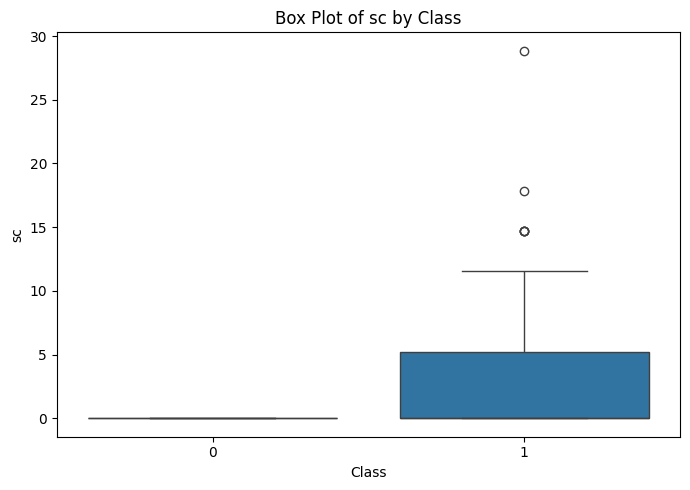

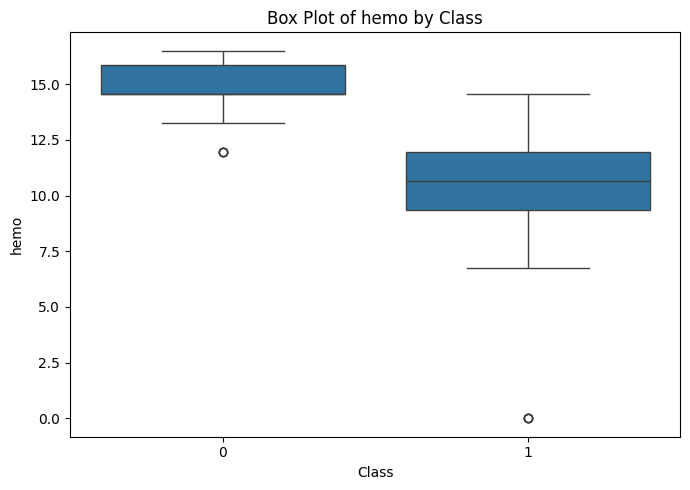

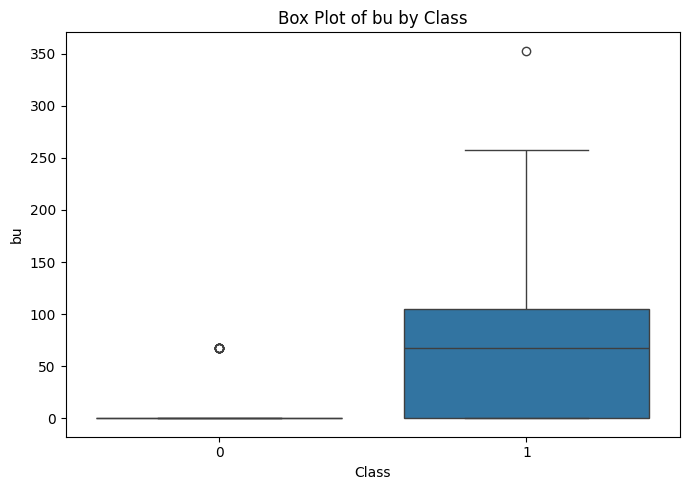

In [20]:
for col in key_numeric:
    if col in df.columns:
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=df, x='class', y=col) # Generate a box plot
        plt.title(f'Box Plot of {col} by Class')
        plt.xlabel('Class')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()



#### Insights or Next Steps
*   The distinct distributions and outlier patterns revealed by these box plots across different classes provide strong indicators for differentiating between healthy and diseased states, aiding in feature selection for predictive models.
*   A deeper analysis of the identified outliers is recommended to determine if they represent significant clinical cases, data entry errors, or natural variations requiring further medical investigation or specialized handling in modeling.


In [21]:
outliers_data = {}
print("Initialized 'outliers_data' dictionary.")

Initialized 'outliers_data' dictionary.


In [22]:
for col in key_numeric:
    for class_label in df['class'].unique():
        subset = df[(df['class'] == class_label) & (df[col].notna())][col]

        Q1 = subset.quantile(0.25)
        Q3 = subset.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df['class'] == class_label) & ((df[col] < lower_bound) | (df[col] > upper_bound))]

        if not outliers.empty:
            outliers_data[(col, class_label)] = outliers
            print(f"Outliers identified for {col} in class {class_label}: {len(outliers)} samples")
        else:
            print(f"No outliers identified for {col} in class {class_label}")

print("Outlier identification complete. The 'outliers_data' dictionary contains the identified outliers.")

Outliers identified for sc in class 1: 6 samples
No outliers identified for sc in class 0
Outliers identified for hemo in class 1: 4 samples
Outliers identified for hemo in class 0: 4 samples
Outliers identified for bu in class 1: 1 samples
Outliers identified for bu in class 0: 9 samples
Outlier identification complete. The 'outliers_data' dictionary contains the identified outliers.


In [23]:
print("\n--- Sample of Identified Outliers ---")
for (col, class_label), outliers_df in outliers_data.items():
    print(f"\nSample of Outliers for {col} in class {class_label} ({len(outliers_df)} samples total):")
    display(outliers_df.head())



--- Sample of Identified Outliers ---

Sample of Outliers for sc in class 1 (6 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
23,1.023,0.0,1,0.0,1,0,0,133.0,219.55,0.0,...,False,False,False,False,False,False,False,True,False,1
65,1.016,0.0,1,0.0,0,1,0,0.0,219.55,120.5,...,False,False,False,False,True,False,False,False,False,1
98,1.010,0.0,1,0.0,1,0,0,259.0,219.55,130.5,...,False,True,False,False,False,False,False,False,False,1
111,1.010,0.0,0,0.0,1,0,0,0.0,181.45,135.5,...,False,False,False,False,False,False,False,True,False,1
156,1.010,0.0,0,0.0,1,0,0,175.0,352.90,158.0,...,False,False,False,False,False,True,False,False,False,1



Sample of Outliers for hemo in class 1 (4 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
23,1.023,0.0,1,0.0,1,0,0,133.0,219.55,0.0,...,False,False,False,False,False,False,False,True,False,1
73,1.020,0.0,0,0.0,0,0,0,0.0,105.25,125.5,...,False,False,False,False,True,False,False,False,False,1
76,1.016,0.0,1,0.0,1,0,0,133.0,105.25,130.5,...,False,False,False,False,True,False,False,False,False,1
167,1.020,0.0,1,0.0,1,0,1,175.0,105.25,140.5,...,False,False,False,False,False,True,False,False,False,1



Sample of Outliers for hemo in class 0 (4 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
12,1.02,0.0,0,0.0,0,0,0,0.0,0.0,145.5,...,False,False,False,False,False,False,True,False,False,0
18,1.02,0.0,0,0.0,0,0,0,133.0,0.0,145.5,...,False,False,False,False,False,True,False,False,False,0
38,1.02,0.0,0,0.0,0,0,0,133.0,0.0,150.5,...,False,False,False,False,False,True,False,False,False,0
45,1.02,0.0,0,0.0,0,0,0,133.0,0.0,135.5,...,False,False,False,False,False,True,False,False,False,0



Sample of Outliers for bu in class 1 (1 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
156,1.01,0.0,0,0.0,1,0,0,175.0,352.9,158.0,...,False,False,False,False,False,True,False,False,False,1



Sample of Outliers for bu in class 0 (9 samples total):


,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,...,rbcc_≥ 7.41,wbcc_14500 - 16880,wbcc_16880 - 19260,wbcc_19260 - 21640,wbcc_4980 - 7360,wbcc_7360 - 9740,wbcc_9740 - 12120,wbcc_< 4980,wbcc_≥ 24020,class
8,1.023,0.0,0,0.0,0,0,0,133.0,67.15,135.5,...,False,False,False,False,False,False,False,True,False,0
14,1.023,0.0,0,0.0,0,0,0,133.0,67.15,135.5,...,False,False,False,False,True,False,False,False,False,0
48,1.023,0.0,0,0.0,0,0,0,133.0,67.15,135.5,...,False,False,False,False,False,True,False,False,False,0
96,1.020,0.0,0,0.0,0,0,0,133.0,67.15,150.5,...,False,False,False,False,True,False,False,False,False,0
103,1.020,0.0,0,0.0,0,0,0,0.0,67.15,150.5,...,False,False,False,False,False,False,True,False,False,0


### Interpretation of Identified Outliers

Based on the samples displayed:

*   **'sc' (Serum Creatinine) in Class 1 (CKD patients):** The outliers in 'sc' for CKD patients tend to be significantly higher than the typical range for this class. Elevated serum creatinine levels are a direct indicator of impaired kidney function. These outliers might represent individuals with more severe or advanced stages of CKD, requiring closer medical attention.

*   **'hemo' (Hemoglobin) in Class 1 (CKD patients):** Outliers for 'hemo' in CKD patients often show unusually low values. Anemia is a common complication of CKD due to reduced erythropoietin production. These outliers could indicate severe anemia in certain CKD patients, highlighting a critical health concern.

*   **'hemo' (Hemoglobin) in Class 0 (Not CKD patients):** Outliers for 'hemo' in non-CKD patients appear to be both unusually high and low. Extremely low values might suggest other causes of anemia unrelated to CKD, while very high values could point to conditions like polycythemia. These cases warrant investigation to ensure accurate diagnosis.

*   **'bu' (Blood Urea) in Class 1 (CKD patients):** The single outlier for 'bu' in CKD patients shows an extremely high value. Elevated blood urea nitrogen (BUN) is another key indicator of kidney dysfunction. This specific outlier could signify an individual with a severe accumulation of waste products due to very poor kidney filtration.

*   **'bu' (Blood Urea) in Class 0 (Not CKD patients):** The outliers for 'bu' in non-CKD patients also tend to be higher than the typical range for this group. While not as extreme as in some CKD cases, these elevated levels in individuals without CKD could be indicative of dehydration, high protein intake, or other underlying conditions that temporarily or mildly affect kidney function, or could represent early, undiagnosed stages of kidney impairment.

**General Interpretations:**

*   **Clinical Significance:** Outliers often represent cases that deviate significantly from the norm. In a medical context, these could be patients with more severe disease manifestations, co-morbidities, or rare conditions that affect the measured parameters. They are clinically important as they may require different treatment strategies.
*   **Data Quality:** While less likely given the previous cleaning steps, some extreme outliers could theoretically be due to data entry errors or measurement inaccuracies. However, given the nature of medical data, they are more likely to represent genuine, albeit unusual, physiological states.
*   **Feature Importance:** The presence of distinct outliers in key markers like 'sc', 'hemo', and 'bu' for both classes reinforces their importance as discriminative features for CKD prediction. The differences in outlier patterns between CKD and non-CKD groups can be highly informative for model building.
*   **Further Investigation:** These outliers should be examined in more detail. For example, by looking at other clinical parameters for these specific patients to understand the full clinical picture. Depending on the modeling approach, these outliers might need special handling (e.g., capping, transformation, or specific models robust to outliers).

## Summary:

### Q&A
**What are the potential interpretations of the identified outliers for 'sc', 'hemo', and 'bu'?**

*   **'sc' (Serum Creatinine) in CKD patients:** High 'sc' values suggest more severe or advanced stages of CKD.
*   **'hemo' (Hemoglobin) in CKD patients:** Low 'hemo' values indicate severe anemia, a common complication of CKD.
*   **'hemo' (Hemoglobin) in Not CKD patients:** Both unusually high and low 'hemo' values may suggest other underlying conditions not related to CKD, such as polycythemia or different forms of anemia.
*   **'bu' (Blood Urea) in CKD patients:** An extremely high 'bu' value points to severe accumulation of waste products due to very poor kidney function.
*   **'bu' (Blood Urea) in Not CKD patients:** Elevated 'bu' values could indicate dehydration, high protein intake, other mild kidney issues, or potentially early, undiagnosed stages of kidney impairment.
*   **General Interpretation:** Outliers often represent clinically significant cases, such as patients with more severe disease manifestations or comorbidities. They can also highlight the importance of these features in discriminating between CKD and non-CKD groups.

### Data Analysis Key Findings
*   Using the Interquartile Range (IQR) method, outliers were identified for 'sc', 'hemo', and 'bu' for both CKD and Not CKD patient classes.
*   For **'sc' (Serum Creatinine)**: 6 outliers were found in the CKD class, while no outliers were identified in the Not CKD class. The CKD outliers showed significantly higher 'sc' values, indicating impaired kidney function.
*   For **'hemo' (Hemoglobin)**: 4 outliers were identified in the CKD class (typically low values, indicating anemia) and 4 outliers in the Not CKD class (both unusually high and low values).
*   For **'bu' (Blood Urea)**: 1 outlier was found in the CKD class (an extremely high value, consistent with severe kidney dysfunction) and 9 outliers in the Not CKD class (higher than typical, suggesting potential underlying issues).
*   The presence of distinct outlier patterns for 'sc', 'hemo', and 'bu' between the CKD and Not CKD groups reinforces their importance as discriminative features for CKD prediction.

### Insights or Next Steps
*   The identified outliers represent significant clinical deviations and should be further investigated by examining other associated clinical parameters to understand the full patient profile.
*   For future modeling, these outliers might require specific handling strategies, such as capping, transformation, or the use of models robust to outliers, to ensure accurate and reliable predictions.
